# Bounded Paths' Length Problem

### The main routine that we will use works when the input is a tree (directed towards the root).

*min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length):*

*   tree: List of lists representing the tree, where tree[i] contains the indices of incoming neighbors of vertex i
*   voting_costs: List where voting_costs[i] is the voting cost of vertex i
*   delegating_costs: List where delegating_costs[i] is the delegating cost of vertex i (we will mostly use the unit list hereinafter)
*   max_path_length: Maximum allowed path length from a delegating vertex to a casting voter
* it returns a tuple showing the minimum cost and the list of indices of selected voters to cast ballots.


In [1]:
import matplotlib.pyplot as plt

def min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length):
    n = len(tree)  # Number of vertices

    # Find root: vertex with no outgoing edges
    is_child = [False] * n
    for i in range(n):
        for child in tree[i]:
            is_child[child] = True

    root = -1
    for i in range(n):
        if not is_child[i]:
            root = i
            break

    if root == -1:
        raise ValueError("No root found. The input is not a valid tree.")

    # Initialize DP table,dp[v][k] = (cost, selected vertices) for subtree rooted at v with max path length k
    dp = [[(float('inf'), []) for _ in range(max_path_length + 1)] for _ in range(n)]

    # bottom-up traversal
    def dfs(vertex):
        children = tree[vertex]

        # Base case: leaf node
        if not children:
            # Leaf vertex votes
            dp[vertex][0] = (voting_costs[vertex], [vertex])

            # Leaf vertex delegates (only valid if max_path_length > 0)
            for k in range(1, max_path_length + 1):
                dp[vertex][k] = (delegating_costs[vertex], [])

            return

        # Process children first
        for child in children:
            dfs(child)

        # Case 1: vertex votes
        selected_vertices = [vertex]
        total_cost = voting_costs[vertex]

        for child in children:
            # For each child, find the best option (vote or delegate with any valid path length)
            min_child_cost = float('inf')
            best_child_selected = []

            # Child votes
            child_cost, child_selected = dp[child][0]
            if child_cost < min_child_cost:
                min_child_cost = child_cost
                best_child_selected = child_selected

            # Child delegates
            for k in range(1, max_path_length + 1):
                child_cost, child_selected = dp[child][k]
                if child_cost < min_child_cost:
                    min_child_cost = child_cost
                    best_child_selected = child_selected

            total_cost += min_child_cost
            selected_vertices.extend(best_child_selected)

        dp[vertex][0] = (total_cost, selected_vertices)

        # Case 2: vertex delegates (only valid if k > 0)
        for k in range(1, max_path_length + 1):
            selected_vertices = []
            total_cost = delegating_costs[vertex]

            for child in children:
                # For each child, find the best option
                # Either child votes, or delegates with path length k-1
                min_child_cost = float('inf')
                best_child_selected = []

                # Child votes
                child_cost, child_selected = dp[child][0]
                if child_cost < min_child_cost:
                    min_child_cost = child_cost
                    best_child_selected = child_selected

                # Child delegates with path length k-1 (only if k > 1)
                if k > 1:
                    child_cost, child_selected = dp[child][k-1]
                    if child_cost < min_child_cost:
                        min_child_cost = child_cost
                        best_child_selected = child_selected

                total_cost += min_child_cost
                selected_vertices.extend(best_child_selected)

            dp[vertex][k] = (total_cost, selected_vertices)

    dfs(root)

    # Root must vote
    min_cost, selected_vertices = dp[root][0]


    # print(f"Selected vertices: {selected_vertices}")
    # all_vertices = set(range(len(tree)))
    # delegating_vertices = all_vertices - set(selected_vertices)
    # print(f"Delegating vertices: {list(delegating_vertices)}")
    # total_delegating_cost = sum(delegating_costs[v] for v in delegating_vertices)
    # print(f"Total cost breakdown: Voting = {total_voting_cost}, Delegating = {total_delegating_cost}, Total = {total_voting_cost + total_delegating_cost}")


    total_voting_cost = sum(voting_costs[v] for v in selected_vertices)
    # print(f"Total voting cost: {total_voting_cost}")


    return total_voting_cost, selected_vertices

### Some examples on the usage of our main DP routine follow

In [2]:
    """
    Simple tree example:
         0
        / \
       1   2
      / \   \
     3   4   5
    """
tree = [
        [1, 2],  # 0 has incoming edges from 1 and 2
        [3, 4],  # 1 has incoming edges from 3 and 4
        [5],     # 2 has incoming edge from 5
        [],      # 3 has no incoming edges
        [],      # 4 has no incoming edges
        []       # 5 has no incoming edges
    ]

voting_costs = [12, 6, 3, 2, 2, 12]
delegating_costs = [1, 1, 1, 1, 1, 1]
max_path_length = 1

min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)

(19, [0, 3, 4, 2])

In [3]:
    """
    Deeper tree example:
           0
          / \
         1   2
        /     \
       3       4
      / \     / \
     5   6   7   8
    """
tree = [
        [1, 2],   # 0 has incoming edges from 1 and 2
        [3],      # 1 has incoming edge from 3
        [4],      # 2 has incoming edge from 4
        [5, 6],   # 3 has incoming edges from 5 and 6
        [7, 8],   # 4 has incoming edges from 7 and 8
        [],       # 5 has no incoming edges
        [],       # 6 has no incoming edges
        [],       # 7 has no incoming edges
        []        # 8 has no incoming edges
    ]

voting_costs = [2, 6, 7, 5, 8, 2, 2, 2, 6]
delegating_costs = [1, 1, 1, 1, 1, 1, 1, 1, 1]

max_path_length = 2

min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)



(13, [0, 5, 6, 2])

In [4]:
    """
    Linear chain example:
    0 <- 1 <- 2 <- 3 <- 4 <- 5
    """
tree = [
        [1],      # 0 has incoming edge from 1
        [2],      # 1 has incoming edge from 2
        [3],      # 2 has incoming edge from 3
        [4],      # 3 has incoming edge from 4
        [5],      # 4 has incoming edge from 5
        []        # 5 has no incoming edges
    ]

voting_costs = [5, 5, 5, 10, 5, 5]
delegating_costs = [1, 1, 1, 1, 1, 1]
max_path_length = 2
min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)


(15, [0, 1, 4])

In [5]:
    """
    Star topology example:
        0
       /|\
      1 2 3
     /|   |\
    4 5   6 7
    """
tree = [
        [1, 2, 3],    # 0 has incoming edges from 1, 2, 3
        [4, 5],       # 1 has incoming edges from 4, 5
        [],           # 2 has no incoming edges
        [6, 7],       # 3 has incoming edges from 6, 7
        [],           # 4 has no incoming edges
        [],           # 5 has no incoming edges
        [],           # 6 has no incoming edges
        []            # 7 has no incoming edges
    ]

voting_costs = [10, 3, 5, 5, 2, 2, 2, 2]
delegating_costs = [1, 1, 1, 1, 1, 1, 1, 1]
max_path_length = 1

min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)

(17, [0, 1, 6, 7])

In [6]:

    """
    Unbalanced tree example:
           0
          / \
         1   2
        /     \
       3       4
      /         \
     5           6
    """
tree = [
        [1, 2],   # 0 has incoming edges from 1 and 2
        [3],      # 1 has incoming edge from 3
        [4],      # 2 has incoming edge from 4
        [5],      # 3 has incoming edge from 5
        [6],      # 4 has incoming edge from 6
        [],       # 5 has no incoming edges
        []        # 6 has no incoming edges
    ]

voting_costs = [12, 7, 7, 4, 9, 2, 2]
delegating_costs = [1, 1, 1, 1, 1, 1, 1]

max_path_length=1
min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)

(25, [0, 3, 2, 6])

### We now extend our code to handle any (connected) graph of out-deg<=1. Those are graphs with at most a cycle, so if we remove an edge (any such) we have a tree and our min_cost_delegation procedure can run. We can repeat this for every possible edge removal.

In [7]:
import networkx as nx
def adjacency_list_to_edgelist(tree):
    """Converts an adjacency list representation to an edge list."""
    edges = []
    for child, parents in enumerate(tree):
        for parent in parents:
            edges.append((parent, child))
    return edges

def is_connected_after_removal(graph, edge):
    """Checks if the graph remains connected after removing the given edge."""
    G = nx.DiGraph(graph)
    G.remove_edge(*edge)
    return nx.is_weakly_connected(G)

def get_tree_after_removal(graph, edge):
    """Returns the tree representation after removing the given edge."""
    G = nx.DiGraph(graph)
    G.remove_edge(*edge)
    tree = [[] for _ in range(len(graph))]
    for u, v in G.edges:
        tree[v].append(u)
    return tree

def min_cost_after_edge_removal(tree, voting_costs, delegating_costs, max_path_length):
    edges = adjacency_list_to_edgelist(tree)
    G = nx.DiGraph(edges)
    min_cost = float('inf')
    best_set = set()

    # If already a tree, run min_cost_delegation without removing anything
    if nx.is_tree(G):
        min_cost, best_set = min_cost_delegation(tree, voting_costs, delegating_costs, max_path_length)

    for edge in G.edges:
        # print('remove:',edge)
        if is_connected_after_removal(G, edge):
            new_tree = get_tree_after_removal(G, edge)
            cost, selected_vertices = min_cost_delegation(new_tree, voting_costs, delegating_costs, max_path_length)
            if cost < min_cost:
                min_cost = cost
                best_set = selected_vertices

    return min_cost, best_set

In [8]:
# Example usage
tree = [
    [1, 2, 10],  # 0 has incoming edges from 1 and 2, 10
    [3],      # 1 has incoming edge from 3
    [4],      # 2 has incoming edge from 4
    [5, 6],   # 3 has incoming edges from 5 and 6
    [7, 8],   # 4 has incoming edges from 7 and 8
    [], [], [], [],  # Leaves
    [0],
    [9]
]
voting_costs = [2, 2, 3, 4, 5, 6, 7, 8, 9, 2, 2]
delegating_costs = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
max_path_length = 6

min_cost, selected_vertices = min_cost_after_edge_removal(tree, voting_costs, delegating_costs, max_path_length)
print(min_cost, selected_vertices)

2 [0]


### Finally, we extend the code to be able to handle disconnected inputs. In that case, we run the previous procedure for each component separately, the returned cost is the sum of voting costs for all components.

In [9]:
def dfs(graph, node, visited, component):
    visited[node] = True
    component.append(node)
    for neighbor in graph[node]:
        if not visited[neighbor]:
            dfs(graph, neighbor, visited, component)


def run_for_connected_components(tree, voting_costs, delegating_costs, max_path_length):
    # Step 1: Check for connected components
    visited = [False] * len(tree)
    components = []
    final_cost = 0

    for node in range(len(tree)):
        if not visited[node]:
            component = []
            dfs(tree, node, visited, component)
            components.append(component)

    # Step 2: Run min_cost_after_edge_removal for each component
    for component in components:
        # print()

        # Step 2a: Handle components of size 1
        if len(component) == 1:
            node = component[0]
            final_cost += voting_costs[node]  # Add the cost of the single node
            selected_vertices = [node]  # The selected vertex is just the single node
            # print(f"Component size 1: selected_vertex (original ID): {node}, cost: {voting_costs[node]}")
            continue  # Skip the min_cost_after_edge_removal for this component

        # Step 2b: For components with at least 2 vertices, proceed normally
        # Create an adjacency list for the component using original node IDs
        subgraph = [[] for _ in range(len(tree))]

        # Copy the relevant edges for the current component, preserving original node IDs
        for node in component:
            for neighbor in tree[node]:
                if neighbor in component:  # Only include neighbors within the component
                    subgraph[node].append(neighbor)

        # Step 2c: Call min_cost_after_edge_removal for the subgraph
        min_cost, selected_vertices = min_cost_after_edge_removal(subgraph, voting_costs, delegating_costs, max_path_length)
        final_cost += min_cost

        # Step 2d: Map selected local component vertices to their original node IDs
        original_selected_vertices = [component[node] for node in selected_vertices]

        # Step 2e: Print the original node IDs (component nodes)
        # print(f"Component min_cost: {min_cost}, selected_vertices (original IDs): {original_selected_vertices}")

    # Step 3: Print the total cost
    # print('\nThe total voting cost to be paid is')
    return final_cost

In [10]:
def run_for_connected_components2(tree, voting_costs, delegating_costs, max_path_length):
    # Step 1: Check for connected components
    visited = [False] * len(tree)
    components = []
    final_cost = 0
    for node in range(len(tree)):
        if not visited[node]:
            component = []
            dfs(tree, node, visited, component)
            components.append(component)
    # Step 2: Run min_cost_after_edge_removal for each component
    print(components)
    for component in components:
        # Step 2a: Handle components of size 1
        if len(component) == 1:
            node = component[0]
            final_cost += voting_costs[node]
            continue
        # Create mapping from original IDs to local indices
        orig_to_local = {orig: local for local, orig in enumerate(component)}
        # Create properly remapped subgraph with consecutive indices
        subgraph = [[] for _ in range(len(component))]
        for orig_node in component:
            local_node = orig_to_local[orig_node]
            for orig_neighbor in tree[orig_node]:
                if orig_neighbor in component:  # Only include neighbors within the component
                    local_neighbor = orig_to_local[orig_neighbor]
                    subgraph[local_node].append(local_neighbor)
        # Map costs to local indices
        local_voting_costs = [voting_costs[orig] for orig in component]
        local_delegating_costs = [delegating_costs[orig] for orig in component]
        # Call min_cost_after_edge_removal with properly remapped subgraph
        min_cost, local_selected_vertices = min_cost_after_edge_removal(
            subgraph, local_voting_costs, local_delegating_costs, max_path_length)
        final_cost += min_cost
        # Map selected local vertices back to original IDs
        original_selected_vertices = [component[local_idx] for local_idx in local_selected_vertices]
        print(original_selected_vertices)
    return final_cost,original_selected_vertices

In [11]:
def find_connected_components(graph):
    n = len(graph)
    # Convert directed graph to undirected for component analysis
    undirected_graph = [[] for _ in range(n)]
    for node in range(n):
        for neighbor in graph[node]:
            undirected_graph[node].append(neighbor)
            undirected_graph[neighbor].append(node)  # Add reverse edge

    # Remove duplicates in adjacency lists
    for node in range(n):
        undirected_graph[node] = list(set(undirected_graph[node]))

    # Standard DFS to find connected components
    visited = [False] * n
    components = []

    def dfs(node, component):
        visited[node] = True
        component.append(node)
        for neighbor in undirected_graph[node]:
            if not visited[neighbor]:
                dfs(neighbor, component)

    for node in range(n):
        if not visited[node]:
            component = []
            dfs(node, component)
            components.append(component)

    return components

def run_for_connected_components3(tree, voting_costs, delegating_costs, max_path_length):
    # Step 1: Find connected components using the undirected version of the graph
    components = find_connected_components(tree)
    # print(components)

    final_cost = 0
    original_selected_vertices = []

    # Step 2: Run min_cost_after_edge_removal for each component
    for component in components:
        # Step 2a: Handle components of size 1
        if len(component) == 1:
            node = component[0]
            final_cost += voting_costs[node]
            # print(node)
            continue

        # Create mapping from original IDs to local indices
        orig_to_local = {orig: local for local, orig in enumerate(component)}

        # Create properly remapped subgraph with consecutive indices
        # Note: Keeping the original directed structure for the algorithm
        subgraph = [[] for _ in range(len(component))]
        for orig_node in component:
            local_node = orig_to_local[orig_node]
            for orig_neighbor in tree[orig_node]:
                if orig_neighbor in component:  # Only include neighbors within the component
                    local_neighbor = orig_to_local[orig_neighbor]
                    subgraph[local_node].append(local_neighbor)

        # Map costs to local indices
        local_voting_costs = [voting_costs[orig] for orig in component]
        local_delegating_costs = [delegating_costs[orig] for orig in component]

        # Call min_cost_after_edge_removal with properly remapped subgraph
        min_cost, local_selected_vertices = min_cost_after_edge_removal(
            subgraph, local_voting_costs, local_delegating_costs, max_path_length)

        final_cost += min_cost

        # Map selected local vertices back to original IDs
        component_selected_vertices = [component[local_idx] for local_idx in local_selected_vertices]
        original_selected_vertices.extend(component_selected_vertices)
        # print(component_selected_vertices)

    return final_cost

In [12]:
graph = [
    [1],  # Component 1
    [2],  # this is a path of length 2
    [],   # Leaf in Component 1
    [4],  # Component 2; path of length 1
    [],   # Leaf in Component 2
    [6],  # Component 3; path of length 1
    []    # Leaf in Component 3
]
voting_costs = [1, 2, 3, 4, 5, 6, 7]
max_path_length = 1

run_for_connected_components3(graph, voting_costs, [1]*len(graph), max_path_length)

13

In [13]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,DelID,GuruID,Answer,AverageExpertise,Weight,CodeQuestion,CodeExclu,ExpNum,Proba,Confidence,AvergeConfidence,gender,gender_,country,ProbaDel
0,0,2,0,NaN,0.0,1.0,0.625,1.0,K1,K,E8,NaN,NaN,NaN,female,NaN,france,0
1,1,3,1,NaN,1.0,1.0,0.250,2.0,K1,K,E8,NaN,NaN,NaN,female,NaN,france,0
2,2,4,2,1.0,1.0,1.0,0.625,0.0,K1,K,E8,NaN,NaN,NaN,female,NaN,france,1
3,3,5,3,NaN,3.0,1.0,0.625,1.0,K1,K,E8,NaN,NaN,NaN,female,NaN,france,0
4,4,6,4,NaN,4.0,1.0,0.875,1.0,K1,K,E8,NaN,NaN,NaN,male,NaN,france,0


- ID is the user ID
- DelID is the ID of the user they delegate to
- GuruID is the ID of the person that represent them (through transitive delegations)
- CodeExclu is the task we are evaluating on
- AverageExpertise is the expertise of that user for that task
- Weight is the number of person a user represents

In [14]:
df['AverageExpertise'] = df['AverageExpertise'].apply(lambda x: int(10-round(x, 1)*10)) # to trun expertise into a cost between 0 and 10. An expertise of 1 is turned to a voting cost of 0.

In [15]:
df['AverageExpertise'].unique()

array([ 4,  8,  1,  2,  5,  6,  0, 10,  9,  3,  7])

In [16]:
def build_graph(code_q, exp_num): # for a given task and experiment number, builds the graph and the vector of voting cost per voter
    essai = df.loc[(df.CodeQuestion == code_q)&(df.ExpNum == exp_num)]
    graph = []
    voting_cost = []
    for i, r in essai.iterrows():
        leaves = list(essai.loc[essai.DelID == r.ID].ID)
        graph.append(leaves)
        voting_cost.append(r.AverageExpertise)
    return graph, voting_cost


In [17]:
def count_long_paths(graph, min_length=5):
    n = len(graph)
    count = 0

    # First find connected components (for directed graph)
    undirected_graph = [[] for _ in range(n)]
    for node in range(n):
        for neighbor in graph[node]:
            undirected_graph[node].append(neighbor)
            undirected_graph[neighbor].append(node)  # Add reverse edge

    visited_components = [False] * n
    components = []

    def find_components_dfs(node, component):
        visited_components[node] = True
        component.append(node)
        for neighbor in undirected_graph[node]:
            if not visited_components[neighbor]:
                find_components_dfs(neighbor, component)

    for node in range(n):
        if not visited_components[node]:
            component = []
            find_components_dfs(node, component)
            components.append(component)

    # Find longest path in each component
    def find_longest_path(node, path_length, visited):
        nonlocal longest_path
        longest_path = max(longest_path, path_length)

        for neighbor in graph[node]:
            if not visited[neighbor]:
                visited[neighbor] = True
                find_longest_path(neighbor, path_length + 1, visited)
                visited[neighbor] = False  # Backtrack

    # For each component, try all possible starting nodes
    for component in components:
        component_longest_path = 0

        for start_node in component:
            visited = [False] * n
            visited[start_node] = True
            longest_path = 0
            find_longest_path(start_node, 0, visited)
            component_longest_path = max(component_longest_path, longest_path)

        # print(f"Component {component}: longest path length = {component_longest_path}")
        if component_longest_path >= min_length:
            count += 1

    return count

In [18]:
graph, voting_cost = build_graph('K1','E1') # example for experiment E1 on task K (don't worry about the 1; I should have handled that below)
run_for_connected_components3(graph, voting_cost, [1]*len(graph), 1)
# print(graph,voting_cost)

22

In [19]:
graph, voting_cost = build_graph('PE121','E12') # example for experiment E1 on task K (don't worry about the 1; I should have handled that below)
run_for_connected_components3(graph, voting_cost, [1]*len(graph), 5)
# print(graph,voting_cost)

18

In [20]:
graph, voting_cost = build_graph('SR1','E3') # example for experiment E1 on task K (don't worry about the 1; I should have handled that below)
run_for_connected_components3(graph, voting_cost, [1]*len(graph), 5)
print(graph,voting_cost)

[[], [], [], [9, 25], [], [], [], [], [], [3], [], [], [], [], [], [], [], [], [], [5], [1, 15], [], [], [], [], [], [], [18], [], [], [], []] [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0]


# How does the cost depend on the max path constraint?

In [21]:
grouped = df.groupby(['ExpNum', 'CodeExclu']).first().CodeQuestion.reset_index()
data_outcome = []
count_issues = []
for s in range(0,7):
# for s in range(0,0):
    print(f"With max lenght constraint of {s}")
    for ind, row in grouped[['ExpNum', 'CodeQuestion']].iterrows():
        try:
            count_issues.append(0)
            graph, voting_cost = build_graph(row.CodeQuestion, row.ExpNum)
            cost = run_for_connected_components3(graph, voting_cost, [1]*len(graph), s)
            data_outcome.append([row.CodeQuestion, row.ExpNum, s, cost])

            # num_long_paths = count_long_paths(graph, min_length=6)
            # if num_long_paths>0:
              # print(graph,row.CodeQuestion, row.ExpNum)
            # print(f"Number of long paths: {num_long_paths}")
        except:
            print('Graph on which the code does not run:', row.CodeQuestion, row.ExpNum)
            print('Graph: ', graph)
            print('Voting Cost: ', voting_cost)
            count_issues.append(1)
            print( )
sum(count_issues), len(count_issues)


With max lenght constraint of 0
With max lenght constraint of 1
With max lenght constraint of 2
With max lenght constraint of 3
With max lenght constraint of 4
With max lenght constraint of 5
With max lenght constraint of 6


(0, 441)

In [22]:
# Sample DataFrame (replace with your actual df_output)
df_output = pd.DataFrame(data_outcome, columns=['Question', 'ExpNum', 'Constraint', 'Cost'])

# Iterate over unique pairs of Question and ExpNum
for question, expnum in df_output[['Question', 'ExpNum']].drop_duplicates().values:
    # Filter the dataframe for each pair
    filtered_df = df_output[(df_output['Question'] == question) & (df_output['ExpNum'] == expnum)]

    # Display the constraints and costs for the current pair
    print(f"Question: {question}, ExpNum: {expnum}")
    print("Constraints and Costs:")
    print(filtered_df[['Constraint', 'Cost']])
    print("\n")  # Adding a newline for separation between pairs

Question: K1, ExpNum: E1
Constraints and Costs:
     Constraint  Cost
0             0    28
63            1    22
126           2    22
189           3    22
252           4    22
315           5    22
378           6    22


Question: PC1, ExpNum: E1
Constraints and Costs:
     Constraint  Cost
1             0    56
64            1    26
127           2    26
190           3    26
253           4    26
316           5    26
379           6    26


Question: PE11, ExpNum: E1
Constraints and Costs:
     Constraint  Cost
2             0    34
65            1     8
128           2     8
191           3     8
254           4     8
317           5     8
380           6     8


Question: SR1, ExpNum: E1
Constraints and Costs:
     Constraint  Cost
3             0     6
66            1     3
129           2     3
192           3     3
255           4     3
318           5     3
381           6     3


Question: T1, ExpNum: E1
Constraints and Costs:
     Constraint  Cost
4             0    18


In [23]:
# def reverse_graph(graph):
#     n = len(graph)
#     reversed_graph = [[] for _ in range(n)]

#     # For each vertex i
#     for i, incoming_edges in enumerate(graph):
#         # For each vertex j that has an edge to i
#         for j in incoming_edges:
#             # Add i to j's outgoing edges in the reversed graph
#             reversed_graph[j].append(i)

#     return reversed_graph

In [24]:
'''
graph drawing
'''
# import networkx as nx
# import matplotlib.pyplot as plt

# # Define the adjacency list
# adj_list = [[], [6, 32], [], [20], [], [], [], [], [], [26], [], [], [], [], [], [2, 8, 14, 22, 33], [4], [], [19, 21, 24], [], [], [], [10], [], [], [], [25], [], [], [1, 5, 9, 11, 13, 15, 16, 18, 30, 34, 35], [23], [], [], [], [31], []]
# graph=reverse_graph(adj_list)

# # Create a directed graph
# G = nx.DiGraph()

# # Add edges from the adjacency list
# for node, neighbors in enumerate(graph):
#     for neighbor in neighbors:
#         G.add_edge(node, neighbor)

# # Draw the graph
# plt.figure(figsize=(12, 12))
# pos = nx.spring_layout(G, seed=7)  # Use spring layout for better node positioning
# nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=10, font_weight='bold', arrowsize=15)
# plt.title("Directed Graph Visualization")
# plt.show()

'\ngraph drawing\n'

In [25]:
# print(f"There is a proportion of {round(sum(count_issues)/len(count_issues), 2)} of graphs that can't be computed.")

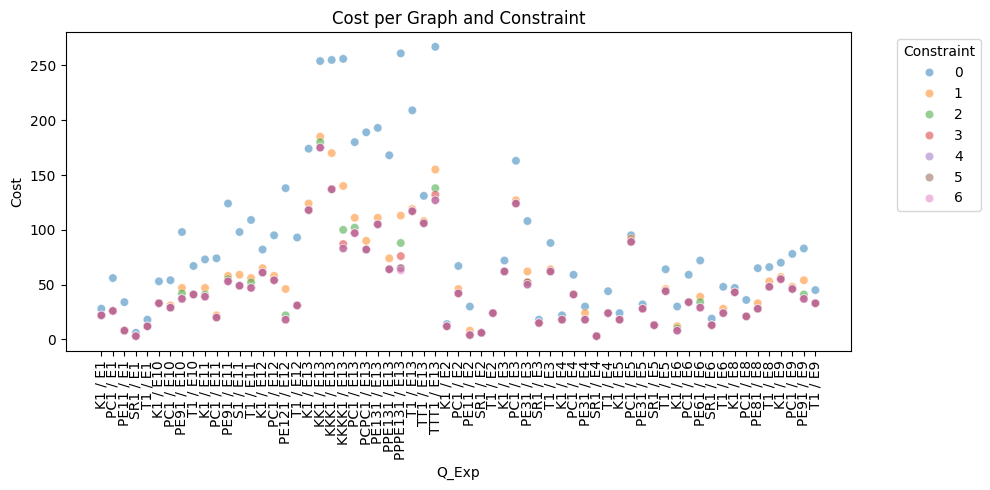

In [26]:
df_output['Q_Exp'] = df_output['Question'].astype(str) + ' / ' + df_output['ExpNum'].astype(str) # create a column with a unique identifier per graph

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_output,
    x='Q_Exp',
    y='Cost',
    hue='Constraint',
    alpha=0.5,
    palette='tab10'
)
plt.xticks(rotation=90)
plt.title("Cost per Graph and Constraint")
plt.xlabel("Q_Exp")
plt.ylabel("Cost")
plt.legend(title='Constraint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### How does the cost depend on the max weights (the number of delegation someone gathered)?

In [27]:
grouped = df.groupby(['ExpNum', 'CodeExclu']).first().CodeQuestion.reset_index()
data_outcome = []
count_issues = []
for s in range(0,6):
    print(f"With max lenght constraint of {s}")
    for ind, row in grouped[['ExpNum', 'CodeQuestion']].iterrows():
        try:
            count_issues.append(0)
            graph, voting_cost = build_graph(row.CodeQuestion, row.ExpNum)
            cost = run_for_connected_components3(graph, voting_cost, [1]*len(graph), s)
            data_outcome.append([row.CodeQuestion, row.ExpNum, s, cost])
        except:
            print('Graph on which the code does not run:', row.CodeQuestion, row.ExpNum)
            print('Graph: ', graph)
            print('Voting Cost: ', voting_cost)
            count_issues.append(1)
            print( )
df_output = pd.DataFrame(data_outcome, columns=['Question', 'ExpNum', 'Constraint', 'Cost'])
sum(count_issues), len(count_issues)

With max lenght constraint of 0
With max lenght constraint of 1
With max lenght constraint of 2
With max lenght constraint of 3
With max lenght constraint of 4
With max lenght constraint of 5


(0, 378)

In [28]:
print(f"There is a proportion of {round(sum(count_issues)/len(count_issues), 2)} of graphs that can't be computed.")

There is a proportion of 0.0 of graphs that can't be computed.


In [29]:
max_weight = df.groupby(by=['ExpNum', 'CodeExclu']).Weight.max().reset_index() # go get the weight from the df original data
max_weight['CodeExclu'] = max_weight['CodeExclu'].astype(str) + '1'
max_weight = max_weight.rename(columns={'CodeExclu': 'Question'})
summary = df_output.groupby(by=['ExpNum', 'Question']).Cost.agg(['mean', 'std']).reset_index()
df_merged = pd.merge(summary, max_weight, on=['ExpNum', 'Question'], how='left') # do a left join

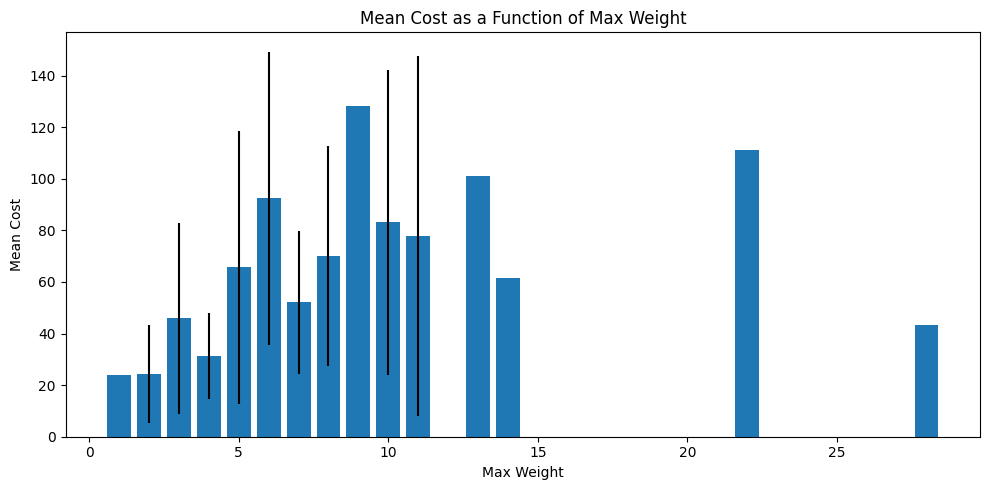

In [30]:
top = df_merged.groupby('Weight')['mean'].agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 5))
plt.bar(top['Weight'], top['mean'], yerr=top['std'])
plt.xlabel('Max Weight')
plt.ylabel('Mean Cost')
plt.title('Mean Cost as a Function of Max Weight')
# plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

# Bounded-Power Problem


In [31]:
def min_cost_representation(graph, voting_costs, max_power):
    n = len(graph)

    # Convert to outgoing edges representation (each vertex has at most one outgoing edge)
    outgoing = [None] * n
    for i, incoming in enumerate(graph):
        for j in incoming:
            outgoing[j] = i  # j points to i

    # Find all connected components
    components = find_connected_components(outgoing, n)

    total_min_cost = 0
    total_best_selection = []

    # Solve for each component separately
    for component in components:
        component_min_cost = float('inf')
        component_best_selection = None

        # Generate all possible subsets of this component
        for mask in range(1, 2**len(component)):
            selected = [component[i] for i in range(len(component)) if (mask >> i) & 1]

            # Check if this selection is valid for this component
            if is_valid_selection_for_component(outgoing, selected, component, max_power):
                # Calculate cost of this selection
                cost = sum(voting_costs[i] for i in selected)

                # Update minimum cost selection
                if cost < component_min_cost:
                    component_min_cost = cost
                    component_best_selection = selected

        # Add this component's optimal solution to the total
        if component_best_selection:
            total_min_cost += component_min_cost
            total_best_selection.extend(component_best_selection)

    return total_best_selection, total_min_cost

def find_connected_components(outgoing, n):
    """Find all connected components in the graph."""
    visited = [False] * n
    components = []

    for i in range(n):
        if not visited[i]:
            # Start a new component from vertex i
            component = []
            nodes_to_visit = [i]

            while nodes_to_visit:
                node = nodes_to_visit.pop()
                if not visited[node]:
                    visited[node] = True
                    component.append(node)

                    # Add all connected nodes
                    if outgoing[node] is not None and not visited[outgoing[node]]:
                        nodes_to_visit.append(outgoing[node])

                    # Check for incoming edges to this node
                    for j in range(n):
                        if outgoing[j] == node and not visited[j]:
                            nodes_to_visit.append(j)

            components.append(component)

    return components

def is_valid_selection_for_component(outgoing, selected, component, max_power):
    """Check if a selection is a valid solution under the constraints, for a specific component."""
    component_set = set(component)
    representatives = {}

    # For each non-selected vertex in this component, find its representative
    for i in component:
        if i not in selected:
            rep = find_representative(outgoing, i, selected)
            if rep is None or rep not in selected:  # No path to any selected vertex
                return False
            representatives[i] = rep

    # Count representations for each selected vertex
    representation_count = {v: 1 for v in selected}  # Start with 1 (itself)
    for vertex, rep in representatives.items():
        representation_count[rep] += 1

    # Check if any selected vertex exceeds max_power
    for v in selected:
        if representation_count[v] > max_power:
            return False

    return True

def find_representative(outgoing, start, selected):
    """Find the selected vertex that represents the start vertex; to be used when checking for validity of a solution"""
    visited = set()
    current = start

    while current is not None and current not in selected:
        if current in visited:  # Cycle detected
            return None
        visited.add(current)
        current = outgoing[current]  # Follow the outgoing edge

    return current  # Either None or a selected vertex

In [32]:
'''
TEST 1
'''
graph = [
        [1, 2],  # 0 has incoming edges from 1 and 2
        [3, 4],  # 1 has incoming edges from 3 and 4
        [5],     # 2 has incoming edge from 5
        [],      # 3 has no incoming edges
        [],      # 4 has no incoming edges
        [],      # 5 has no incoming edges
        [7],
        [],
        []
    ]
voting_costs = [12, 9, 3, 4, 4, 12,0,5,10]
max_power = 6

selected, cost = min_cost_representation(graph, voting_costs, max_power)
print(f"Selected vertices: {selected}")
print(f"Total cost: {cost}")



Selected vertices: [0, 6, 8]
Total cost: 22


In [33]:
'''
TEST 2
'''
graph=[[], [], [], [], [], [], [], [], [], [], [4]]
voting_cost=[2, 0, 6, 2, 6, 2, 2, 4, 0, 2, 2]
max_power=1
selected, cost = min_cost_representation(graph, voting_cost, max_power)
print(f"Selected vertices: {selected}")
print(f"Total cost: {cost}")


Selected vertices: [0, 1, 2, 3, 4, 10, 5, 6, 7, 8, 9]
Total cost: 28


In [34]:
'''
The following code finds the minimum cost solution under the power constraint for all datasets.
There is a timeout function that stops the execution if a dataset takes too long to complete.
Running this code we can identify the datasets that took too long to complete: PE121-E12 and PPPE131-E13.
Hence, we run the code for all the rest.
We pick max power values to be from 1 to 15. A value of 0 will not result in a feasible solution and after 15, we observed that the results do not change.
'''

import multiprocessing
import time
from functools import partial

def run_with_timeout(func, args, timeout_seconds):

    # Create a process pool with one worker
    pool = multiprocessing.Pool(processes=1)

    # Submit the function to the pool
    result_object = pool.apply_async(func, args)

    try:
        # Wait for the result with timeout
        result = result_object.get(timeout=timeout_seconds)
        pool.close()
        return result, True  # Success
    except multiprocessing.TimeoutError:
        pool.terminate()
        return None, False  # Timeout occurred
    finally:
        pool.join()

# Update your loop with timeout handling
grouped = df.groupby(['ExpNum', 'CodeExclu']).first().CodeQuestion.reset_index()
data_outcome = []
count_issues = []
timeout_seconds = 45  # Set timeout to 45 seconds

for s in range(1, 16):
    print(f"With max length constraint of {s}")
    for ind, row in grouped[['ExpNum', 'CodeQuestion']].iterrows():
        try:
            print(ind, row.ExpNum, row.CodeQuestion)
            if not(row.CodeQuestion == 'PE121' and row.ExpNum == 'E12') and not(row.CodeQuestion == 'PPPE131' and row.ExpNum == 'E13'):
                count_issues.append(0)
                graph, voting_cost = build_graph(row.CodeQuestion, row.ExpNum)
                print(graph, voting_cost)

                # Run min_cost_representation with timeout
                result, completed = run_with_timeout(
                    min_cost_representation,
                    (graph, voting_cost, s),
                    timeout_seconds
                )

                if completed:
                    selected, cost = result
                    data_outcome.append([row.CodeQuestion, row.ExpNum, s, cost])
                    print('selected:', selected)
                else:
                    print(f'Timeout after {timeout_seconds} seconds for:', row.CodeQuestion, row.ExpNum)
                    count_issues[-1] = 1  # Mark as issue
                    data_outcome.append([row.CodeQuestion, row.ExpNum, s, None])  # Add with None cost

        except Exception as e:
            print('Error on graph:', row.CodeQuestion, row.ExpNum)
            print('Graph: ', graph)
            print('Voting Cost: ', voting_cost)
            print('Error:', str(e))
            count_issues.append(1)
            print()

print(sum(count_issues), len(count_issues))

With max length constraint of 1
0 E1 K1
[[], [], [], [], [], [], [], [], [], [], [4]] [2, 0, 6, 2, 6, 2, 2, 4, 0, 2, 2]
selected: [0, 1, 2, 3, 4, 10, 5, 6, 7, 8, 9]
1 E1 PC1
[[], [4], [], [2, 7], [], [0], [], [], [6], []] [7, 3, 9, 7, 4, 6, 6, 4, 6, 4]
selected: [0, 5, 1, 4, 2, 3, 7, 6, 8, 9]
2 E1 PE11
[[], [3, 7, 8], [], [4, 6], [], [], [], [], [], [0, 2]] [6, 4, 0, 0, 6, 4, 6, 2, 6, 0]
selected: [0, 9, 2, 1, 8, 7, 3, 6, 4, 5]
3 E1 SR1
[[3], [0, 8], [], [], [], [], [], [], [], []] [0, 0, 0, 3, 3, 0, 0, 0, 0, 0]
selected: [0, 3, 1, 8, 2, 4, 5, 6, 7, 9]
4 E1 T1
[[], [], [], [7], [8], [], [], [], [], []] [4, 0, 0, 2, 2, 2, 0, 4, 2, 2]
selected: [0, 1, 2, 3, 7, 4, 8, 5, 6, 9]
5 E10 K1
[[], [], [], [2, 4, 8, 9, 14], [5], [], [], [], [], [], [], [], [], [], [], [], [], [0], []] [2, 6, 1, 1, 1, 4, 5, 0, 5, 5, 1, 2, 5, 4, 4, 1, 2, 2, 2]
selected: [0, 17, 1, 2, 3, 14, 9, 8, 4, 5, 6, 7, 10, 11, 12, 13, 15, 16, 18]
6 E10 PC1
[[], [], [1, 9], [6, 10, 16], [], [4], [], [], [], [], [], [12], [], []

In [35]:
print(f"There is a proportion of {round(sum(count_issues)/len(count_issues), 2)} of graphs that can't be computed.")

There is a proportion of 0.0 of graphs that can't be computed.


In [36]:
'''
The code below finds the maximum power that can be set as a constraint for all datasets such that after which the min cost solution remains the same.
'''


# import pandas as pd
# import numpy as np

# # Convert data_outcome to DataFrame if not already done
# df_output = pd.DataFrame(data_outcome, columns=['Question', 'ExpNum', 'Constraint', 'Cost'])

# # Make sure Cost is numeric and handle any None values
# df_output['Cost'] = pd.to_numeric(df_output['Cost'], errors='coerce')
# df_output = df_output.dropna(subset=['Cost'])
# df_output['Constraint'] = pd.to_numeric(df_output['Constraint'], errors='coerce')

# # Create a function to find the effective maximum constraint
# def find_max_effective_constraint(group):
#     # Sort by constraint value
#     group = group.sort_values('Constraint')

#     # Find where costs change (or don't change)
#     group['cost_change'] = group['Cost'].diff() != 0

#     # If there are no changes or only one constraint value, return the max constraint
#     if len(group) <= 1 or not any(group['cost_change']):
#         return group['Constraint'].max()

#     # Find the last constraint where cost changed
#     last_change_idx = group[group['cost_change']].index.max()
#     last_change_constraint = group.loc[last_change_idx, 'Constraint']

#     return last_change_constraint

# # Initialize results containers
# max_effective_constraints = []
# dataset_results = []

# # Iterate over unique pairs of Question and ExpNum
# for (question, expnum), group in df_output.groupby(['Question', 'ExpNum']):
#     # Skip if fewer than 2 constraint values
#     if len(group) < 2:
#         continue

#     # Find max effective constraint for this dataset
#     max_constraint = find_max_effective_constraint(group)

#     # Store results
#     dataset_results.append({
#         'Question': question,
#         'ExpNum': expnum,
#         'MaxEffectiveConstraint': max_constraint,
#         'NumConstraints': len(group),
#         'MinCost': group['Cost'].min(),
#         'MaxCost': group['Cost'].max()
#     })

#     max_effective_constraints.append(max_constraint)

# # Create a DataFrame with the results
# results_df = pd.DataFrame(dataset_results)

# # Find the overall maximum effective constraint
# overall_max = max(max_effective_constraints) if max_effective_constraints else None

# # Print summary
# print("Maximum Effective Constraint for Each Dataset:")
# print(results_df[['Question', 'ExpNum', 'MaxEffectiveConstraint', 'MinCost', 'MaxCost']])
# print(f"\nOverall Maximum Effective Constraint: {overall_max}")

# # Detailed print for each dataset
# print("\n\nDetailed Analysis by Dataset:")
# for question, expnum in df_output[['Question', 'ExpNum']].drop_duplicates().values:
#     # Filter the dataframe for each pair
#     filtered_df = df_output[(df_output['Question'] == question) & (df_output['ExpNum'] == expnum)]
#     filtered_df = filtered_df.sort_values('Constraint')

#     # Calculate if cost changes between consecutive constraints
#     filtered_df['CostDiff'] = filtered_df['Cost'].diff()

#     # Display the constraints and costs for the current pair
#     print(f"Question: {question}, ExpNum: {expnum}")
#     print("Constraints, Costs, and Differences:")
#     print(filtered_df[['Constraint', 'Cost', 'CostDiff']])

#     # Find the last constraint where cost changed
#     if len(filtered_df) > 1:
#         max_effective = [row for i, row in enumerate(filtered_df['Constraint'])
#                         if i < len(filtered_df) - 1 and filtered_df['CostDiff'].iloc[i+1] != 0]
#         max_effective = max_effective[-1] if max_effective else filtered_df['Constraint'].max()
#         print(f"Maximum Effective Constraint: {max_effective}")
#     else:
#         print("Not enough data points to determine maximum effective constraint")

#     print("\n")  # Adding a newline for separation between pairs


'\nThe code below finds the maximum power that can be set as a constraint for all datasets such that after which the min cost solution remains the same.\n'

In [37]:
# Sample DataFrame (replace with your actual df_output)
df_output = pd.DataFrame(data_outcome, columns=['Question', 'ExpNum', 'Constraint', 'Cost'])

# Iterate over unique pairs of Question and ExpNum
for question, expnum in df_output[['Question', 'ExpNum']].drop_duplicates().values:
    # Filter the dataframe for each pair
    filtered_df = df_output[(df_output['Question'] == question) & (df_output['ExpNum'] == expnum)]

    # Display the constraints and costs for the current pair
    print(f"Question: {question}, ExpNum: {expnum}")
    print("Constraints and Costs:")
    print(filtered_df[['Constraint', 'Cost']])
    print("\n")  # Adding a newline for separation between pairs

Question: K1, ExpNum: E1
Constraints and Costs:
     Constraint  Cost
0             1    28
61            2    22
122           3    22
183           4    22
244           5    22
305           6    22
366           7    22
427           8    22
488           9    22
549          10    22
610          11    22
671          12    22
732          13    22
793          14    22
854          15    22


Question: PC1, ExpNum: E1
Constraints and Costs:
     Constraint  Cost
1             1    56
62            2    30
123           3    26
184           4    26
245           5    26
306           6    26
367           7    26
428           8    26
489           9    26
550          10    26
611          11    26
672          12    26
733          13    26
794          14    26
855          15    26


Question: PE11, ExpNum: E1
Constraints and Costs:
     Constraint  Cost
2             1    34
63            2    16
124           3     8
185           4     8
246           5     8
307          

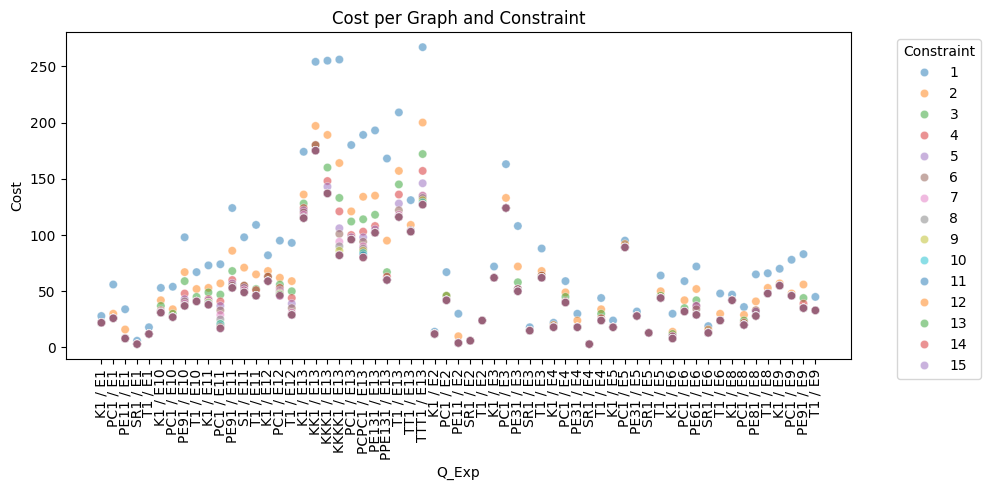

In [38]:
df_output['Q_Exp'] = df_output['Question'].astype(str) + ' / ' + df_output['ExpNum'].astype(str) # create a column with a unique identifier per graph

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_output,
    x='Q_Exp',
    y='Cost',
    hue='Constraint',
    alpha=0.5,
    palette='tab10'
)
plt.xticks(rotation=90)
plt.title("Cost per Graph and Constraint")
plt.xlabel("Q_Exp")
plt.ylabel("Cost")
plt.legend(title='Constraint', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()